<a href="https://colab.research.google.com/github/soeren2311/Youtube-Syntax/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Libraries importieren**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

### **Erstelle einen zufälligen Datensatz**

- Hundert Datenpunkte
- 3 Clusterzentren

- **X** ist eine Matrix mit der Form (n_samples, n_features), die die Merkmale der generierten Datenpunkte enthält....
**n_samples** = Anzahl der generierten Datenpunkte (default=100)
**n_features** = der Merkmale pro Datenpunkt (default=2)

In diesem Fall enthält jeder Datenpunkt 2 Merkmale, 
sodass X eine Matrix mit der Form (100, 2) ist.

- **y** ist ein Vektor der Länge n_samples, der die Clusterkategorie jedes Datenpunkts angibt. Jeder Eintrag in y gibt die Clusterkategorie für den entsprechenden Datenpunkt in der entsprechenden Zeile von X an. In diesem Beispiel gibt es 3 Cluster, so dass y eine Matrix der Form (100,) ist und jedes Element in y eine Zahl von 0 bis 2 ist, die angibt, welchem Cluster der entsprechende Datenpunkt angehört.

In [62]:
X, y = make_blobs(n_samples=10000, centers=4, random_state=42) ## Erzeuge Datensatz mit make_blobs

In [33]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [34]:
print(X[:10])
print(y[:10])

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 [ 4.18051794  1.12332531]
 [ 4.38028748  0.47002673]
 [-6.82261407 -6.61151731]
 [ 5.02007669  2.58375543]
 [-5.96329952 -6.53362112]
 [-6.65571306 -5.51596916]
 [ 5.8463878   1.15623401]]
[3 2 2 1 1 2 1 2 2 1]


*   Die **KMeans-Instanz** wird mit der Anzahl der zu identifizierenden Cluster *n_clusters* und einem zufälligen Seed-Wert *random_state* initialisiert. 3 Cluster werden identifiziert und Seed-Wert auf 42 festgelegt.
*   Mit **kmeans.fit(X)** wird der Clustering-Algorithmus mit dem Datensatz X trainiert. **fit()** ist eine Methode der KMeans-Klasse, die den Algorithmus auf die Daten anwendet und die Clusterzentren berechnet. 



In [63]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

*  **X[:, 0] und X[:, 1]** sind die ersten und zweiten  Spalten von X, die die x- und y-Koordinaten jedes Datenpunkts enthalten. 
*   **X[:, 0]** gibt die erste Spalte von X zurück, die alle x-Koordinaten enthält, während **X[:, 1]** die zweite Spalte von X zurückgibt, die alle y-Koordinaten enthält.


*   Der Parameter **c=kmeans.labels_** ordnet jeder Farbe in der Farbskala eine eindeutige Clusterkategorie zu, so dass jeder Cluster in einer anderen Farbe dargestellt wird.



*   kmeans.cluster_centers_[:, 0] = x-Koordinate der Clusterzentren  
*   kmeans.cluster_centers_[:, 1]: = y-Koordinate der Clusterzentren



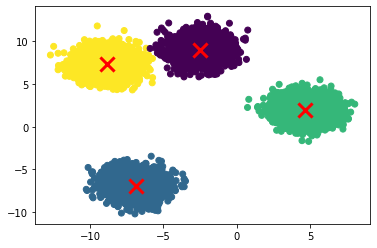

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

### **Elbow-Methode**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

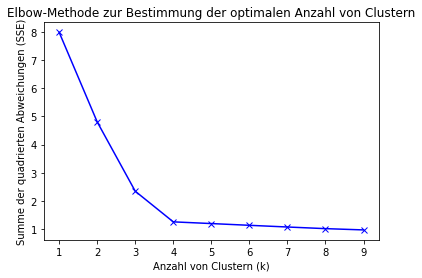

In [59]:
sse = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Erstellung des SSE-Graphen
plt.plot(K, sse, 'bx-')
plt.xlabel('Anzahl von Clustern (k)')
plt.ylabel('Summe der quadrierten Abweichungen (SSE)')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl von Clustern')
plt.show()